In [1]:
## CARGAR LA lIBRERIAS

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as ticker
from sklearn.covariance import EmpiricalCovariance, MinCovDet

import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.set_printoptions(suppress=True)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Librerías para arboles de decision 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Librerias para regresión logística
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Librería para PCA
from sklearn.decomposition import PCA
# Libreria para KMeans
from sklearn.cluster import KMeans
# Libreria para normalizar
from sklearn.preprocessing import StandardScaler
# Libreria para separar en train y test
from sklearn.model_selection import train_test_split
# Librería para RandomForest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# Librerías para métricas
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report,recall_score, f1_score
import scipy 
# Seteo para que no se muestre notación científica
np.set_printoptions(suppress=True)

import warnings
warnings.filterwarnings("ignore")

In [2]:
%env OMP_NUM_THREADS = 4

env: OMP_NUM_THREADS=4


### CONTEXTO COMERCIAL

La Institución educativa AAA School, es una institución de educacion internacional, que comercializa servicios de turismo para estudiantes de diferentes regiones que quieran hacer programas de formacion en sus instalaciones y a la vez conocer la ciudad y los principales sitios turisticos del pais en donde esta ubicada.

La institución cuenta con los registros en un aplicativo de inscripciones a un programa de inducción donde se presenta los beneficios de estudiar en este reconocido instituto, en este CRM han guardado la informacion de los estudiantes que han tomado los paquetes de programa de formacion y viaje con ellos.

una vez exportada esta información, se puede evidenciar que la data cuenta con datos de fechas de viaje, fechas de pago, fechas de inscripcion, tipo de programa, numero de matricula, nivel de ingresos, grado de los estudiantes actuales que van a tomar la inducción o los programas, fechas de reuniones con los padres de los estudiantes, entre otras caracteristicas, para lo cual adjuntamos el Dataset y sus caracteristicas.


#### Llamamos el dataset que contiene la informacion relevante para el análisis.

In [3]:
nueva_ruta = 'C:\\Users\\cf0163spc\\Desktop\\Python\\Data Cruda'

In [4]:
df=pd.read_csv('03 CSV data -- STC(A)_numerical dates .CSV')

#### Identificamos los encabezados de las columnas para darnos una idea ordenada de que contiene el dataset.

In [5]:
df.head()

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0,1,A,40557,40557,...,K,Elementary,K->Elementary,H,1,0.063646,0.936508,4,L,1
1,2,HC,8.0,8.0,AZ,0,7,A,40557,40564,...,Middle,Middle,Middle->Middle,H,1,0.025882,0.880000,3,L,1
2,3,HD,8.0,8.0,FL,0,3,A,40558,40560,...,Middle,Middle,Middle->Middle,H,1,0.025131,0.888889,3,L,1
3,4,HN,9.0,12.0,VA,1,3,B,40558,40560,...,Undefined,Undefined,Undefined->Undefined,H,0,NaN,1.000000,0,NaN,0
4,5,HD,6.0,8.0,FL,0,6,T,40559,40564,...,Middle,Middle,Middle->Middle,H,0,0.112500,0.910112,8,M-L,0


#### Traemos la información consolidada de las columnas que nos permitira identificar: el nombre de cada columna, con el número de regisros en cada una y el tipo de dato si es porcentaje, numero entero, entre otros. en este ejemplo vemos que existen 56 columnas con 2388 registros las que mas datos tiene.

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2389 non-null   int64  
 1   Program.Code                    2389 non-null   object 
 2   From.Grade                      2262 non-null   float64
 3   To.Grade                        2239 non-null   float64
 4   Group.State                     2389 non-null   object 
 5   Is.Non.Annual.                  2389 non-null   int64  
 6   Days                            2389 non-null   int64  
 7   Travel.Type                     2389 non-null   object 
 8   Departure.Date                  2389 non-null   int64  
 9   Return.Date                     2389 non-null   int64  
 10  Deposit.Date                    2389 non-null   int64  
 11  Special.Pay                     470 non-null    object 
 12  Tuition                         23

#### Posteriormente ejecutamos un describe, para conocer los promedios, el dato, mínimo, el máximo los cuartiles del dataset, que nos permitiran tomar decisiones para el análisis de los datos.

In [7]:
df.describe()

,ID,From.Grade,To.Grade,Is.Non.Annual.,Days,Departure.Date,Return.Date,Deposit.Date,Tuition,FRP.Active,...,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,Retained.in.2012.
count,2389.000000,2262.000000,2239.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,...,2389.000000,2052.000000,2052.000000,2052.000000,2052.000000,2389.000000,2298.000000,2389.000000,2389.000000,2389.000000
mean,1195.000000,7.268347,7.912908,0.154039,4.575136,40670.764337,40674.498535,40475.821264,1615.217664,16.867727,...,1.102135,40408.495614,40441.601365,262.083821,228.978070,0.556718,0.066184,0.900667,2.953537,0.607367
std,689.789219,1.388350,1.558226,0.361062,1.432128,35.217643,35.243691,37.906251,645.096047,16.942782,...,0.611544,72.393761,43.666436,79.520208,53.636014,0.496877,0.081112,0.049119,2.876422,0.488439
min,1.000000,3.000000,3.000000,0.000000,1.000000,40557.000000,40557.000000,40081.000000,79.000000,0.000000,...,0.000000,39945.000000,39945.000000,-204.000000,-204.000000,0.000000,0.000922,0.600000,0.000000,0.000000
25%,598.000000,7.000000,8.000000,0.000000,4.000000,40642.000000,40645.000000,40466.000000,1174.000000,6.000000,...,1.000000,40404.250000,40429.000000,208.000000,196.750000,0.000000,0.020787,0.882353,1.000000,0.000000
50%,1195.000000,8.000000,8.000000,0.000000,5.000000,40680.000000,40683.000000,40479.000000,1700.000000,12.000000,...,1.000000,40435.000000,40442.000000,250.000000,233.000000,1.000000,0.045256,0.909091,2.000000,1.000000
75%,1792.000000,8.000000,8.000000,0.000000,5.000000,40701.000000,40704.000000,40487.000000,2048.000000,23.000000,...,1.000000,40449.000000,40451.000000,287.000000,261.000000,1.000000,0.087517,0.933333,4.000000,1.000000
max,2389.000000,12.000000,12.000000,1.000000,12.000000,40724.000000,40729.000000,40846.000000,4200.000000,257.000000,...,2.000000,40821.000000,40821.000000,749.000000,749.000000,1.000000,2.052632,1.000000,47.000000,1.000000


#### Con el ánimo de ver si tenemos registros duplicados, contamos los valores que presentan esta caracteristica y asi, definimos si hay que remediar o no esta situación. 

In [8]:
df.duplicated().value_counts()

False    2389
dtype: int64

#### En este caso no tuvimos registros duplicados.

## Gráfico Bivariada Barplot

#### Teniendo en cuenta el tipo de viaje que realizan los estudiantes, se quiere evidenciar con un  gráfico el número promedio de días de alojamiento que toman en su paquete para la induccion.

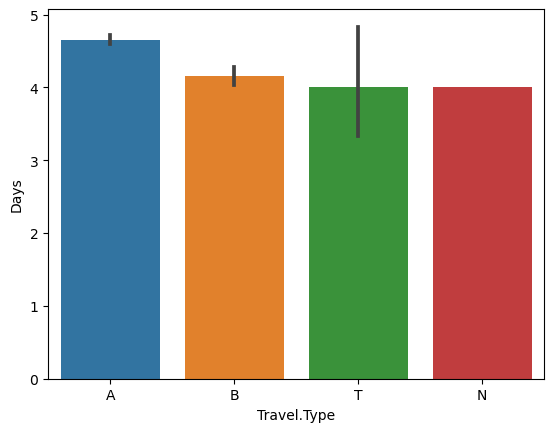

In [9]:
sns.barplot(data = df,
           x = 'Travel.Type',
           y = 'Days')

plt.gca().yaxis.set_major_formatter('{:.0f}'.format)  # No Mostrar 2 decimales en el eje y

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))  # Mostrar formato numérico con puntos en el eje y


## Gráfico Univariada_Histograma

#### vemos interesante tambien ir analizando que tipo de paquete toman los estudiantes, cual es el de mayor frecuencia y asi, ir determinanado si hay o no una preferencia notable


([0, 1, 2, 3],
 [Text(0, 0, 'A'), Text(1, 0, 'B'), Text(2, 0, 'T'), Text(3, 0, 'N')])

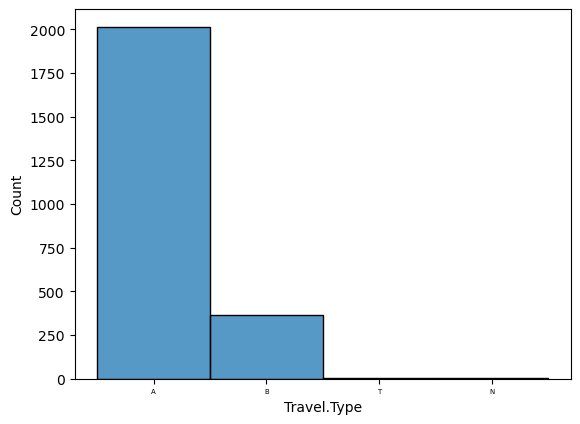

In [10]:
plt.figure()
sns.histplot(data = df,
                x = 'Travel.Type')
plt.xticks(fontsize=5)


#### En este caso los estudiantes que asisten a la institución toman el paquete tipo A, con todo incluido en su gran mayorìa, esto es entendible, porque la mayoria son de estados diferentes a donde esta la universidad y desean garantizar que tiene todo cubierto.

### FEATURES CATEGORICAS

In [11]:
features_categoricas = df.select_dtypes(include=['object'])
features_categoricas.columns

Index(['Program.Code', 'Group.State', 'Travel.Type', 'Special.Pay',
       'Poverty.Code', 'Region', 'School.Type', 'MDR.Low.Grade',
       'Income.Level', 'SPR.Product.Type', 'SPR.New.Existing',
       'SchoolGradeTypeLow', 'SchoolGradeTypeHigh', 'SchoolGradeType',
       'DepartureMonth', 'GroupGradeTypeLow', 'GroupGradeTypeHigh',
       'GroupGradeType', 'MajorProgramCode', 'SchoolSizeIndicator'],
      dtype='object')

#### Definimos cuántos valores distintos tiene cada categoría?

In [12]:
valores_distintos = features_categoricas.nunique()
print(valores_distintos.sort_values(ascending=False))

Group.State            54
Program.Code           28
Income.Level           22
GroupGradeType         13
MDR.Low.Grade          12
SchoolGradeType         9
Poverty.Code            6
Region                  6
SPR.Product.Type        6
GroupGradeTypeLow       6
DepartureMonth          6
MajorProgramCode        4
GroupGradeTypeHigh      4
SchoolSizeIndicator     4
SchoolGradeTypeHigh     4
SchoolGradeTypeLow      4
School.Type             4
Travel.Type             4
Special.Pay             3
SPR.New.Existing        2
dtype: int64


####  Hacemos la selección de las variables categoricas que vamos a trabajar

In [13]:
col_aTransformar = valores_distintos.index[valores_distintos<=4]
col_aTransformar

Index(['Travel.Type', 'Special.Pay', 'School.Type', 'SPR.New.Existing',
       'SchoolGradeTypeLow', 'SchoolGradeTypeHigh', 'GroupGradeTypeHigh',
       'MajorProgramCode', 'SchoolSizeIndicator'],
      dtype='object')

### ONE HOT ENCODING

#### Para transformarlas, vamos a usar el método get_dummies de pandas, de esta manera las podemos usar en el dataset ya convertidas en unos y ceros, así: 

In [14]:
df_dummies = pd.get_dummies(df[col_aTransformar],drop_first=True)
df_dummies.head()

,Travel.Type_B,Travel.Type_N,Travel.Type_T,Special.Pay_FR,Special.Pay_SA,School.Type_Catholic,School.Type_PUBLIC,School.Type_Private non-Christian,SPR.New.Existing_NEW,SchoolGradeTypeLow_High,...,SchoolGradeTypeHigh_Undefined,GroupGradeTypeHigh_High,GroupGradeTypeHigh_Middle,GroupGradeTypeHigh_Undefined,MajorProgramCode_H,MajorProgramCode_I,MajorProgramCode_S,SchoolSizeIndicator_M-L,SchoolSizeIndicator_S,SchoolSizeIndicator_S-M
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0


### CONTEXTO ANALITICO

Para este análisis, se cuenta con la base de datos de las inscripciones del año anterior.

La información contiene las fechas en que fueron registrados los estudiantes, si estos tomaron el paquete de viaje o no, tambien si los estudiantes cuentan con los ingresos familiares no solo que les permita costear el programa inicial sino, matricularse en programas adicionales con la institución. 

### PROBLEMATICA
El departamento de marketing de la institución requiere, conocer los principales estudiantes que se matriculan en sus programas y si renuevan matricula para tomar nuevos cursos al año siguiente, por otra parte requieren conocer de donde provienen los alumnos  frecuentes y en que estados se deberia hacer mayor promocion de su oferta academica, para lograr la consecusion de mayores programas contratados.



### OBJETIVO
El Departamento de marketing podra con esta información, realizar una estrategia de mercadeo mas eficiente y focalizada, que les permita orientarse a los estudiantes con la capacidad de tomar no solo uno sino varios programas en la institución, reteniendo a los estudiantes objetivo.

####  Continuamos limpiando la data y validando otras variables categoricas que nos impactan.

In [15]:
df['From.Grade'] = df['From.Grade'].astype('category')
df['To.Grade'] = df['To.Grade'].astype('category')
df['Is.Non.Annual.'] = df['Is.Non.Annual.'].astype('category')
df['Parent.Meeting.Flag'] = df['Parent.Meeting.Flag'].astype('category')
df['Days'] = df['Days'].astype('category')
df['CRM.Segment'] = df['CRM.Segment'].astype('category')
df['MDR.High.Grade'] = df['MDR.High.Grade'].astype('category')
df['School.Sponsor'] = df['School.Sponsor'].astype('category')
df['NumberOfMeetingswithParents'] = df['CRM.Segment'].astype('category')
df['SingleGradeTripFlag'] = df['SingleGradeTripFlag'].astype('category')
df.info()

# se encontraron 10 variables que no estaban clasificadas correctamente, por lo cual las convertimos en tipo Categoricas.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              2389 non-null   int64   
 1   Program.Code                    2389 non-null   object  
 2   From.Grade                      2262 non-null   category
 3   To.Grade                        2239 non-null   category
 4   Group.State                     2389 non-null   object  
 5   Is.Non.Annual.                  2389 non-null   category
 6   Days                            2389 non-null   category
 7   Travel.Type                     2389 non-null   object  
 8   Departure.Date                  2389 non-null   int64   
 9   Return.Date                     2389 non-null   int64   
 10  Deposit.Date                    2389 non-null   int64   
 11  Special.Pay                     470 non-null    object  
 12  Tuition             

#### podemos observar que la mayoria de los estudiantes vienen del estado de California, y corresponde al 30% de los inscritos, seguido de Texas con un  12% el cual representa el 42% de nuestros registros.

In [16]:
df['Group.State'].value_counts() 

CA                718
TX                308
WA                147
IL                104
CO                 89
MI                 71
FL                 62
AZ                 53
OH                 53
MN                 51
OR                 51
WI                 46
IN                 43
MO                 43
NE                 42
TN                 38
MA                 36
IA                 35
OK                 33
LA                 31
KS                 26
GA                 22
AL                 21
NV                 20
NM                 20
NY                 19
VA                 18
KY                 16
NC                 16
MD                 15
CT                 15
ID                 14
SD                 11
AR                 10
SC                 10
HI                  9
MS                  9
UT                  9
ME                  7
NH                  7
MT                  6
NJ                  6
AK                  5
PA                  5
ND                  5
RI        

In [17]:
def CombineRareCategories(data, mincount):
    for col in data.columns:
        if (type(data[col][0]) == str):
            for index, row in pd.DataFrame(data[col].value_counts()).iterrows():
                if ( row[0] < mincount):
                    df[col].replace(index, 'Other_' + col, inplace = True)
                else:
                    None

In [18]:
CombineRareCategories(df, 10)  

In [19]:
df[0:10]

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0,1,A,40557,40557,...,K,Elementary,K->Elementary,H,1,0.063646,0.936508,4,L,1
1,2,HC,8.0,8.0,AZ,0,7,A,40557,40564,...,Middle,Middle,Middle->Middle,H,1,0.025882,0.880000,3,L,1
2,3,HD,8.0,8.0,FL,0,3,A,40558,40560,...,Middle,Middle,Middle->Middle,H,1,0.025131,0.888889,3,L,1
3,4,HN,9.0,12.0,VA,1,3,B,40558,40560,...,Undefined,Undefined,Undefined->Undefined,H,0,NaN,1.000000,0,NaN,0
4,5,HD,6.0,8.0,FL,0,6,Other_Travel.Type,40559,40564,...,Middle,Middle,Middle->Middle,H,0,0.112500,0.910112,8,M-L,0
5,6,HC,10.0,12.0,LA,0,4,A,40560,40563,...,High,High,High->High,H,0,0.010650,0.909091,1,L,1
6,7,SG,11.0,12.0,MA,1,6,A,40561,40566,...,High,High,High->High,S,0,0.111111,0.925926,2,S,0
7,8,Other_Program.Code,9.0,9.0,Other_Group.State,0,8,A,40567,40574,...,Undefined,Undefined,Undefined->Undefined,I,1,NaN,0.928571,1,NaN,0
8,9,CC,8.0,8.0,AZ,0,8,A,40572,40579,...,Middle,High,Middle->High,C,1,0.104000,0.928571,4,S-M,1
9,10,HD,8.0,8.0,TX,0,4,A,40581,40584,...,PK,Middle,PK->Middle,H,1,0.103937,0.916667,6,M-L,1


### REMPLAZO O IMPUTO DATOS FALTANTES

In [20]:
pd.DataFrame(df).isna().sum() 

ID                                   0
Program.Code                         0
From.Grade                         127
To.Grade                           150
Group.State                          0
Is.Non.Annual.                       0
Days                                 0
Travel.Type                          0
Departure.Date                       0
Return.Date                          0
Deposit.Date                         0
Special.Pay                       1919
Tuition                              0
FRP.Active                           0
FRP.Cancelled                        0
FRP.Take.up.percent.                 0
Early.RPL                          673
Latest.RPL                          19
Cancelled.Pax                        0
Total.Discount.Pax                   0
Initial.System.Date                  8
Poverty.Code                       599
Region                               0
CRM.Segment                          4
School.Type                          0
Parent.Meeting.Flag      

In [21]:
for col in df:
    if df[col].isna().sum() != 0: 
        df[col + '_surrogate'] = df[col].isna().astype(int)


#### Encontramos 17 columnas con valores nulos, lo cual nos indica que debemos hacer imputacion de estos datos, a traves de los promedios de los mismos.

In [22]:
imputer = SimpleImputer(missing_values = np.nan, strategy='constant')
imputer.fit(df.select_dtypes(exclude=['int64','float64']))
df[df.select_dtypes(exclude=['int64','float64']).columns] = imputer.transform(df.select_dtypes(exclude=['int64','float64']))

In [23]:
imputer = SimpleImputer(missing_values = np.nan, strategy='median')
imputer.fit(df.select_dtypes(include=['int64','float64']))
df[df.select_dtypes(include=['int64','float64']).columns] = imputer.transform(df.select_dtypes(include=['int64','float64']))


In [24]:
df[['Poverty.Code','Poverty.Code_surrogate']]


,Poverty.Code,Poverty.Code_surrogate
0,B,0
1,C,0
2,C,0
3,missing_value,1
4,D,0
...,...,...
2384,C,0
2385,C,0
2386,missing_value,1
2387,missing_value,1


#### Identificamos que a las variables cualitativas no se les puede aplicar el promedio, en este caso usariamos la moda de ser necesario.

In [25]:
df = pd.get_dummies(df, columns = df.select_dtypes(exclude=['int64','float64']).columns, drop_first = True)

In [26]:
pd.options.display.max_columns = None 

In [27]:
df.head()

,ID,Departure.Date,Return.Date,Deposit.Date,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Total.School.Enrollment,EZ.Pay.Take.Up.Rate,FPP,Total.Pax,SPR.Group.Revenue,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,Retained.in.2012.,Program.Code_CD,Program.Code_HC,Program.Code_HD,Program.Code_HG,Program.Code_HN,Program.Code_HO,Program.Code_HS,Program.Code_HVP,Program.Code_IC,Program.Code_Other_Program.Code,Program.Code_SC,Program.Code_SG,Program.Code_SK,Program.Code_SM,Program.Code_ST,From.Grade_4.0,From.Grade_5.0,From.Grade_6.0,From.Grade_7.0,From.Grade_8.0,From.Grade_9.0,From.Grade_10.0,From.Grade_11.0,From.Grade_12.0,From.Grade_missing_value,To.Grade_4.0,To.Grade_5.0,To.Grade_6.0,To.Grade_7.0,To.Grade_8.0,To.Grade_9.0,To.Grade_10.0,To.Grade_11.0,To.Grade_12.0,To.Grade_missing_value,Group.State_AR,Group.State_AZ,Group.State_CA,Group.State_CO,Group.State_CT,Group.State_FL,Group.State_GA,Group.State_IA,Group.State_ID,Group.State_IL,Group.State_IN,Group.State_KS,Group.State_KY,Group.State_LA,Group.State_MA,Group.State_MD,Group.State_MI,Group.State_MN,Group.State_MO,Group.State_NC,Group.State_NE,Group.State_NM,Group.State_NV,Group.State_NY,Group.State_OH,Group.State_OK,Group.State_OR,Group.State_Other_Group.State,Group.State_SC,Group.State_SD,Group.State_TN,Group.State_TX,Group.State_VA,Group.State_WA,Group.State_WI,Is.Non.Annual._1,Days_2,Days_3,Days_4,Days_5,Days_6,Days_7,Days_8,Days_9,Days_10,Days_11,Days_12,Travel.Type_B,Travel.Type_Other_Travel.Type,Special.Pay_FR,Special.Pay_SA,Special.Pay_missing_value,Poverty.Code_B,Poverty.Code_C,Poverty.Code_D,Poverty.Code_E,Poverty.Code_Other_Poverty.Code,Poverty.Code_missing_value,Region_Houston,Region_Northern California,Region_Other,Region_Pacific Northwest,Region_Southern California,CRM.Segment_2.0,CRM.Segment_3.0,CRM.Segment_4.0,CRM.Segment_5.0,CRM.Segment_6.0,CRM.Segment_7.0,CRM.Segment_8.0,CRM.Segment_9.0,CRM.Segment_10.0,CRM.Segment_11.0,CRM.Segment_missing_value,School.Type_Catholic,School.Type_PUBLIC,School.Type_Private non-Christian,Parent.Meeting.Flag_1,MDR.Low.Grade_4,MDR.Low.Grade_5,MDR.Low.Grade_6,MDR.Low.Grade_7,MDR.Low.Grade_8,MDR.Low.Grade_9,MDR.Low.Grade_K,MDR.Low.Grade_Other_MDR.Low.Grade,MDR.Low.Grade_PK,MDR.Low.Grade_missing_value,MDR.High.Grade_2.0,MDR.High.Grade_3.0,MDR.High.Grade_4.0,MDR.High.Grade_5.0,MDR.High.Grade_6.0,MDR.High.Grade_7.0,MDR.High.Grade_8.0,MDR.High.Grade_9.0,MDR.High.Grade_10.0,MDR.High.Grade_11.0,MDR.High.Grade_12.0,MDR.High.Grade_missing_value,Income.Level_B,Income.Level_C,Income.Level_D,Income.Level_E,Income.Level_F,Income.Level_G,Income.Level_H,Income.Level_I,Income.Level_J,Income.Level_K,Income.Level_L,Income.Level_M,Income.Level_N,Income.Level_O,Income.Level_Other_Income.Level,Income.Level_P,Income.Level_Q,Income.Level_Z,Income.Level_missing_value,School.Sponsor_1,SPR.Product.Type_Costa Rica,SPR.Product.Type_East Coast,SPR.Product.Type_International,SPR.Product.Type_Other_SPR.Product.Type,SPR.Product.Type_Science,SPR.New.Existing_NEW,NumberOfMeetingswithParents_2.0,NumberOfMeetingswithParents_3.0,NumberOfMeetingswithParents_4.0,NumberOfMeetingswithParents_5.0,NumberOfMeetingswithParents_6.0,NumberOfMeetingswithParents_7.0,NumberOfMeetingswithParents_8.0,NumberOfMeetingswithParents_9.0,NumberOfMeetingswithParents_10.0,NumberOfMeetingswithParents_11.0,NumberOfMeetingswithParents_missing_value,SchoolGradeTypeLow_High,SchoolGradeTypeLow_Middle,SchoolGradeTypeLow_Undefined,SchoolGradeTypeHigh_High,SchoolGradeTypeHigh_Middle,SchoolGradeTypeHigh_Undefined,SchoolGradeType_Elementary->Middle,SchoolGradeType_High->High,SchoolGradeType_Middle->High,SchoolGradeType_Middle->Middle,SchoolGradeType_Middle->Undefined,SchoolGradeType_Other_SchoolGradeType,SchoolGradeType_Undefined->Undefined,DepartureMonth_February,DepartureMonth_June,DepartureMonth_March,DepartureMonth_May,Departu

In [28]:
variable_Ingresos = df['SPR.Group.Revenue']
variable_Ingresos.describe()

count    2389.000000
mean     1615.217664
std       645.096047
min        79.000000
25%      1174.000000
50%      1700.000000
75%      2048.000000
max      4200.000000
Name: SPR.Group.Revenue, dtype: float64

(0.0, 7000.0)

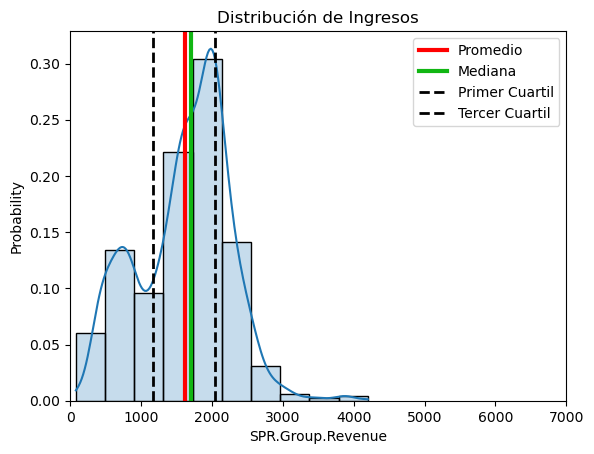

In [29]:
# Histograma variable 
# Primero calculo algunas medidas que quiero presentar 
media = variable_Ingresos.mean()
mediana = variable_Ingresos.median()
primer_cuartil = variable_Ingresos.quantile(0.25)
tercer_cuartil = variable_Ingresos.quantile(0.75)

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'SPR.Group.Revenue',
             bins = 10,            
             alpha = 0.25,
             kde = True,
             stat='probability')
# Agrego linea de promedio 
plt.axvline(x = media, 
            color = 'red',
             linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)
# Agrego linea de mediana 
plt.axvline(x = mediana, 
            color = '#11B613', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)
# Agrego linea de primer cuartil 
plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
# Agrego linea de tercer cuartil 
plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()

plt.title('Distribución de Ingresos')

ax = plt.gca()

plt.xlim(0, 7000)
           


(0.0, 0.3)

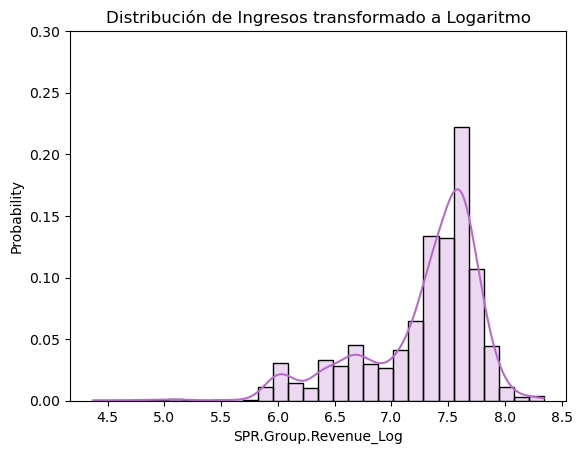

In [30]:
# Genero la variable logaritmica # Genero la variable logaritmica 
df['SPR.Group.Revenue_Log'] = np.log(df['SPR.Group.Revenue'])

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data= df,
             x = 'SPR.Group.Revenue_Log',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#B76BCB')
plt.title('Distribución de Ingresos transformado a Logaritmo')

plt.ylim(0, 0.3)

In [31]:
## DEFINIR LA VARIABE TARGET Y LAS FEATURES

### PREGUNTAS DE INTERÉS
Podemos predecir la cantidad de estudiantes que se van a mantener en la institucion en el futuro?
Podemos saber cual es el estado en donde mas participacion de estudantes tenemos matriculados en el instituto?
Podemos saber el tipo de viaje que toman los estudiantes que estan matriculados en la institucion.

### OBJETIVO:
Predecir la probabilidad de que los estudiantes matriculados en el 2011 permanezcan durante el siguiente año en nuevos programas dentro de la institucion.

### VARIABLE TARGET:
Retained.in.2012

In [32]:
df["Retained.in.2012."].value_counts()

1.0    1451
0.0     938
Name: Retained.in.2012., dtype: int64

 Identificamos que la mayoria de los estudiantes del 2011 se retuvieron en el año 2012, asi que debemos realizar un trabajo de profundizacion y promocion para los estados en donde los estudiantes no estan matriculandose en nuevos programas

In [33]:
# Calculo matriz de correlación 
matriz_correlacion = df.corr(method='pearson')
# Selecciono a la variable target para estudiar únicamente correlación con ella 
matriz_correlacion_target = matriz_correlacion['Retained.in.2012.']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido 
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación 
columnas_a_excluir = ['Retained.in.2012.', 'Retained.in.2012.']
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion 
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

##generamos la matriz de correlaciones para identificar la dependencia de las variables

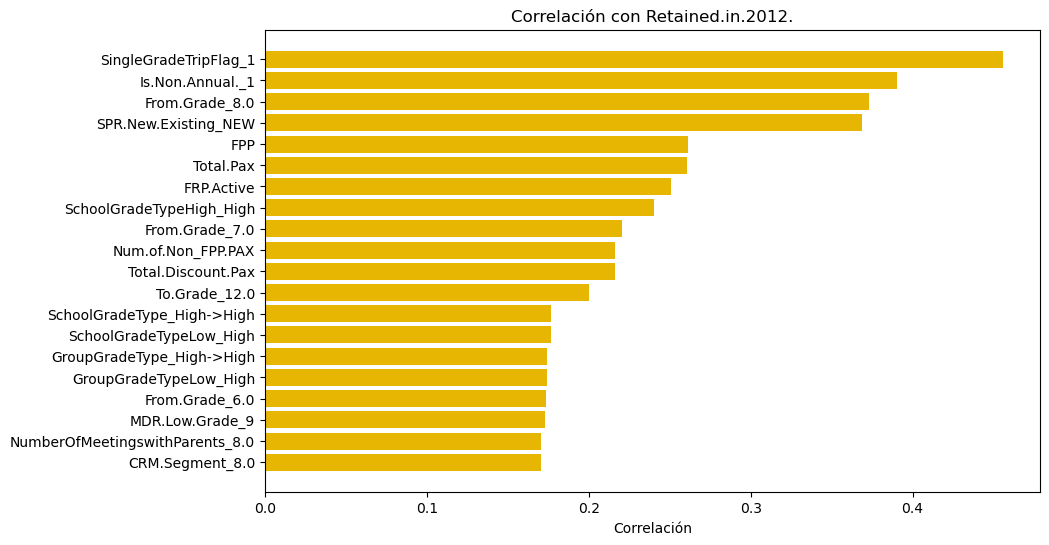

In [34]:
# Grafico el top 12 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:20]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#E7B602')
plt.xlabel('Correlación')
plt.title('Correlación con Retained.in.2012.')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

### Para el modelo que vamos a usar, debemos realizar dos metodos de limpieza de la información:

 1. Variables que no generan informacion, como lo son el ID, Program.Code, entre otras
 2. Las variables mas correlacionadas con la variable target,como: single.grade.trip.flat, IsNonAnnual, FFPP, entre otras

In [35]:
# Elijo el top 10 de variables más correlacionadas con el target
features_selec = matriz_correlacion_target.index[0:10]
features_selec

Index(['SingleGradeTripFlag_1', 'Is.Non.Annual._1', 'From.Grade_8.0',
       'SPR.New.Existing_NEW', 'FPP', 'Total.Pax', 'FRP.Active',
       'SchoolGradeTypeHigh_High', 'From.Grade_7.0', 'Num.of.Non_FPP.PAX'],
      dtype='object')

<Axes: >

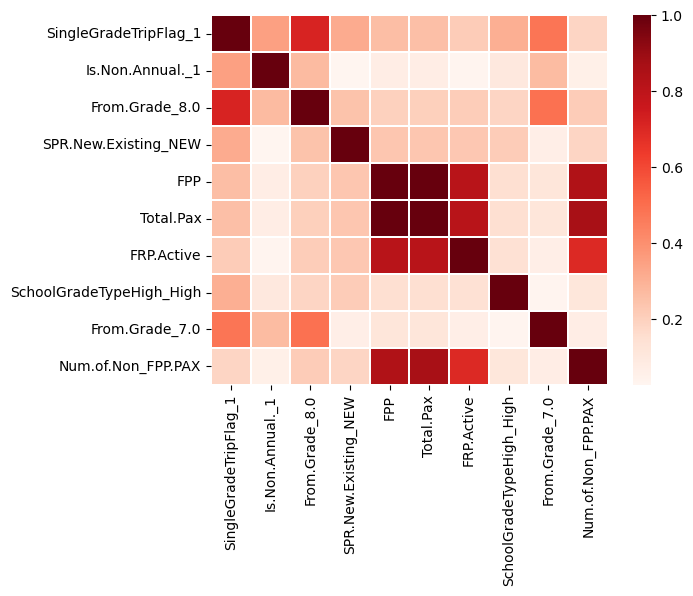

In [36]:
matriz_correlacion = df[features_selec].corr(method='pearson')
sns.heatmap(abs(matriz_correlacion),
           #cbar=False,
           linewidths = 0.3,
           cmap = 'Reds')

#### Para Analizar las variables correlacionadas, se crearon 2 formas de visualizacion, como lo son: 
1. grafica de barras
2. correlograma

## MODELOS

In [37]:
y = df['Retained.in.2012.']
X = df.drop(columns = 'Retained.in.2012.')

In [38]:
y.describe()

count    2389.000000
mean        0.607367
std         0.488439
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Retained.in.2012., dtype: float64

In [39]:
#SE CREAN LAS x Y y PARA PODER PARTIR LOS DATOS EN 80% TRAIN Y UN 20% TEST

In [40]:
X

,ID,Departure.Date,Return.Date,Deposit.Date,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Total.School.Enrollment,EZ.Pay.Take.Up.Rate,FPP,Total.Pax,SPR.Group.Revenue,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,Program.Code_CD,Program.Code_HC,Program.Code_HD,Program.Code_HG,Program.Code_HN,Program.Code_HO,Program.Code_HS,Program.Code_HVP,Program.Code_IC,Program.Code_Other_Program.Code,Program.Code_SC,Program.Code_SG,Program.Code_SK,Program.Code_SM,Program.Code_ST,From.Grade_4.0,From.Grade_5.0,From.Grade_6.0,From.Grade_7.0,From.Grade_8.0,From.Grade_9.0,From.Grade_10.0,From.Grade_11.0,From.Grade_12.0,From.Grade_missing_value,To.Grade_4.0,To.Grade_5.0,To.Grade_6.0,To.Grade_7.0,To.Grade_8.0,To.Grade_9.0,To.Grade_10.0,To.Grade_11.0,To.Grade_12.0,To.Grade_missing_value,Group.State_AR,Group.State_AZ,Group.State_CA,Group.State_CO,Group.State_CT,Group.State_FL,Group.State_GA,Group.State_IA,Group.State_ID,Group.State_IL,Group.State_IN,Group.State_KS,Group.State_KY,Group.State_LA,Group.State_MA,Group.State_MD,Group.State_MI,Group.State_MN,Group.State_MO,Group.State_NC,Group.State_NE,Group.State_NM,Group.State_NV,Group.State_NY,Group.State_OH,Group.State_OK,Group.State_OR,Group.State_Other_Group.State,Group.State_SC,Group.State_SD,Group.State_TN,Group.State_TX,Group.State_VA,Group.State_WA,Group.State_WI,Is.Non.Annual._1,Days_2,Days_3,Days_4,Days_5,Days_6,Days_7,Days_8,Days_9,Days_10,Days_11,Days_12,Travel.Type_B,Travel.Type_Other_Travel.Type,Special.Pay_FR,Special.Pay_SA,Special.Pay_missing_value,Poverty.Code_B,Poverty.Code_C,Poverty.Code_D,Poverty.Code_E,Poverty.Code_Other_Poverty.Code,Poverty.Code_missing_value,Region_Houston,Region_Northern California,Region_Other,Region_Pacific Northwest,Region_Southern California,CRM.Segment_2.0,CRM.Segment_3.0,CRM.Segment_4.0,CRM.Segment_5.0,CRM.Segment_6.0,CRM.Segment_7.0,CRM.Segment_8.0,CRM.Segment_9.0,CRM.Segment_10.0,CRM.Segment_11.0,CRM.Segment_missing_value,School.Type_Catholic,School.Type_PUBLIC,School.Type_Private non-Christian,Parent.Meeting.Flag_1,MDR.Low.Grade_4,MDR.Low.Grade_5,MDR.Low.Grade_6,MDR.Low.Grade_7,MDR.Low.Grade_8,MDR.Low.Grade_9,MDR.Low.Grade_K,MDR.Low.Grade_Other_MDR.Low.Grade,MDR.Low.Grade_PK,MDR.Low.Grade_missing_value,MDR.High.Grade_2.0,MDR.High.Grade_3.0,MDR.High.Grade_4.0,MDR.High.Grade_5.0,MDR.High.Grade_6.0,MDR.High.Grade_7.0,MDR.High.Grade_8.0,MDR.High.Grade_9.0,MDR.High.Grade_10.0,MDR.High.Grade_11.0,MDR.High.Grade_12.0,MDR.High.Grade_missing_value,Income.Level_B,Income.Level_C,Income.Level_D,Income.Level_E,Income.Level_F,Income.Level_G,Income.Level_H,Income.Level_I,Income.Level_J,Income.Level_K,Income.Level_L,Income.Level_M,Income.Level_N,Income.Level_O,Income.Level_Other_Income.Level,Income.Level_P,Income.Level_Q,Income.Level_Z,Income.Level_missing_value,School.Sponsor_1,SPR.Product.Type_Costa Rica,SPR.Product.Type_East Coast,SPR.Product.Type_International,SPR.Product.Type_Other_SPR.Product.Type,SPR.Product.Type_Science,SPR.New.Existing_NEW,NumberOfMeetingswithParents_2.0,NumberOfMeetingswithParents_3.0,NumberOfMeetingswithParents_4.0,NumberOfMeetingswithParents_5.0,NumberOfMeetingswithParents_6.0,NumberOfMeetingswithParents_7.0,NumberOfMeetingswithParents_8.0,NumberOfMeetingswithParents_9.0,NumberOfMeetingswithParents_10.0,NumberOfMeetingswithParents_11.0,NumberOfMeetingswithParents_missing_value,SchoolGradeTypeLow_High,SchoolGradeTypeLow_Middle,SchoolGradeTypeLow_Undefined,SchoolGradeTypeHigh_High,SchoolGradeTypeHigh_Middle,SchoolGradeTypeHigh_Undefined,SchoolGradeType_Elementary->Middle,SchoolGradeType_High->High,SchoolGradeType_Middle->High,SchoolGradeType_Middle->Middle,SchoolGradeType_Middle->Undefined,SchoolGradeType_Other_SchoolGradeType,SchoolGradeType_Undefined->Undefined,DepartureMonth_February,DepartureMonth_June,DepartureMonth_March,DepartureMonth_May,DepartureMonth_Other_Depa

In [41]:
## ESTABLECER VALOR INICIAL SEMILLA PARA GENERAR NUMEROS ALEATORIOS
np.random.seed(77300)

In [42]:
## DIVIDO EL DATA SET EN TRAIN 80% Y TEST EL 20%, DE MANERA ESTRATIFICADA PARA QUE LA PROPORCION DE CLIENTES RETENIDOS Y NO RETENIDOS SEA LA MISMA EN AMBOS
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, stratify=y)


In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1911, 262)
(478, 262)
(1911,)
(478,)


##### ANALISIS DE VARIABLES

In [44]:

import statsmodels.api as sn

x_constant = sn.add_constant(X)
lin_reg = sn.OLS(y,x_constant).fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Retained.in.2012.   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     8.958
Date:                Mon, 26 Feb 2024   Prob (F-statistic):          5.82e-173
Time:                        14:20:45   Log-Likelihood:                -960.05
No. Observations:                2389   AIC:                             2324.
Df Residuals:                    2187   BIC:                             3491.
Df Model:                         201                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        -24.5787     40.645     -0.605      0.545    -104.285      55.128
ID                                         -3.179e-05      0.000     -0.303      0.762      -0.000       0.000
Departure.Date                                -0.0392      0.023     -1.698      0.090      -0.085       0.006
Return.Date                                    0.0415      0.023      1.805      0.071      -0.004       0.087
Deposit.Date                                  -0.0006      0.000     -2.475      0.013      -0.001      -0.000
Tuition                                    -9.487e-05   5.06e-05     -1.874      0.061      -0.000    4.42e-06
FRP.Active                                     0.0030      0.001      2.438      0.015       0.001       0.005
FRP.Cancelled                                 -0.0045      0.005     -0.970      0.332      -0.014       0.005
FRP.Take.up.percent.                           0.0076      0.054      0.141      0.888      -0.098       0.113
Early.RPL                                     -0.0001      0.000     -0.525      0.600      -0.001       0.000
Latest.RPL                                     0.0002      0.000      1.013      0.311      -0.000       0.001
Cancelled.Pax                                  0.0025      0.004      0.681      0.496      -0.005       0.010
Total.Discount.Pax                             0.0028      0.003      1.019      0.308      -0.003       0.008
Initial.System.Date                         3.913e-05      0.000      0.175      0.861      -0.000       0.000
Total.School.Enrollment                     3.472e-06   4.07e-05      0.085      0.932   -7.64e-05    8.34e-05
EZ.Pay.Take.Up.Rate                           -0.0190      0.059     -0.325      0.745      -0.134       0.096
FPP                                           -0.0021      0.002     -1.189      0.235      -0.005       0.001
Total.Pax                                      0.0008      0.001      0.675      0.500      -0.001       0.003
SPR.Group.Revenue                          -9.489e-05   5.06e-05     -1.874      0.061      -0.000    4.41e-06
FirstMeeting                                  -2.0495      3.387     -0.605      0.545      -8.692       4.593
LastMeeting                                    2.0493      3.387      0.605      0.545      -4.593       8.692
DifferenceTraveltoFirstMeeting                -2.0496      3.387     -0.605      0.545      -8.692       4.593
DifferenceTraveltoLastMeeting                  2.0493      3.387      0.605      0.545      -4.593       8.692
FPP.to.School.enrollment                       0.0666      0.149      0.446      0.656      -0.226       0.360
FPP.to.PAX                                     0.2884      0.224      1.286      0.198

#### REGRESION MULTIPLE

In [45]:


from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()
## se entrena el modelo
lr_multiple.fit(X_train,y_train)
## se realiza prediccion
y_pred_multiple = lr_multiple.predict(X_test)

In [46]:

print('Presición del modelo:')
print(lr_multiple.score(X_train,y_train))

Presición del modelo:
0.46038077172937986


LA PRECISION DE ESTE MODELO ES DEL 46%, LO QUE NOS INDICA QUE NO ES UN MODELO TAN EFEICENTE PARA NUESTRO ANALISIS.

#### SVM REGRESION

In [47]:

from sklearn import svm
from sklearn import model_selection
from statsmodels.tools.eval_measures import mse

modelo_svm = svm.SVR()
modelo_svm.fit(X_train,y_train)

SVR()

In [48]:
df.columns

Index(['ID', 'Departure.Date', 'Return.Date', 'Deposit.Date', 'Tuition',
       'FRP.Active', 'FRP.Cancelled', 'FRP.Take.up.percent.', 'Early.RPL',
       'Latest.RPL',
       ...
       'Total.School.Enrollment_surrogate_1', 'Income.Level_surrogate_1',
       'NumberOfMeetingswithParents_surrogate_1', 'FirstMeeting_surrogate_1',
       'LastMeeting_surrogate_1', 'DifferenceTraveltoFirstMeeting_surrogate_1',
       'DifferenceTraveltoLastMeeting_surrogate_1',
       'FPP.to.School.enrollment_surrogate_1',
       'SchoolSizeIndicator_surrogate_1', 'SPR.Group.Revenue_Log'],
      dtype='object', length=263)

#### RANDOM FOREST REGRESSOR

In [49]:

df_analizar= df.loc[df['Retained.in.2012.'].isnull() == False,]

# Declaro features a estudiar
features=['SPR.Group.Revenue_Log','Is.Non.Annual._1','School.Sponsor_1']

# Genero matriz de features y array de target
X = df_analizar[features].values
y = df_analizar['Retained.in.2012.'].values# Crear el modelo de Random Forest
model = RandomForestRegressor(n_estimators = 150, 
                               random_state = 123,
                               max_depth = 5,
                               min_samples_leaf = 100,
                               max_features = 3) 

# Entrenar el modelo
model.fit(X, y)

# Obtener la importancia de las características
feature_importance = model.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)
importance_df.sort_values(by = 'Importance', ascending = False)

,Feature,Importance
1,Is.Non.Annual._1,0.768570
0,SPR.Group.Revenue_Log,0.211938
2,School.Sponsor_1,0.019492


Efectivamente la variable School.Sponsor_1 tiene muy poca relacion con la variable Retained.in.2012, lo que significa  que así el colegio en donde esta el estudiante participe como sponsor del alumno,no influye mayor cosa para definir que este alumno permanezca ( sea Retenido) para el año siguiente en la institucion AAA School

In [50]:
df_train,df_test = train_test_split(df,
                                    test_size = 0.20, #Porcentaje de muestra test 
                                    random_state = 77300) #Semilla

In [51]:
# Check tasas similares 
print('Tasa RETENCION TRAIN:')
print(round(df_train['Retained.in.2012.'].mean(),2))
print('Tasa RETENCION TEST:')
print(round(df_test['Retained.in.2012.'].mean(),2))

Tasa RETENCION TRAIN:
0.61
Tasa RETENCION TEST:
0.59


#### REGRESION LOGISTICA

In [52]:
from sklearn.linear_model import LogisticRegression

# Selecciono features y genero imputs del modelo
features = ['SingleGradeTripFlag_1', 'Is.Non.Annual._1', 'From.Grade_8.0',
       'SPR.New.Existing_NEW', 'FPP', 'Total.Pax', 'FRP.Active',
       'SchoolGradeTypeHigh_High', 'From.Grade_7.0', 'Num.of.Non_FPP.PAX']
X_train = df_train[features].values
y_train = df_train['Retained.in.2012.'].values
X_test = df_test[features].values
y_test = df_test['Retained.in.2012.'].values

# Genero y entreno
reg_log_1 = LogisticRegression()
reg_log_1.fit(X_train, y_train)

# Predicciones
y_pred_train = reg_log_1.predict(X_train)
y_pred_test = reg_log_1.predict(X_test)
y_pred_prob_train = reg_log_1.predict_proba(X_train)[:,1]
y_pred_prob_test = reg_log_1.predict_proba(X_test)[:,1]

print

Text(0.5, 1.0, 'Distribución Estimaciones TEST')

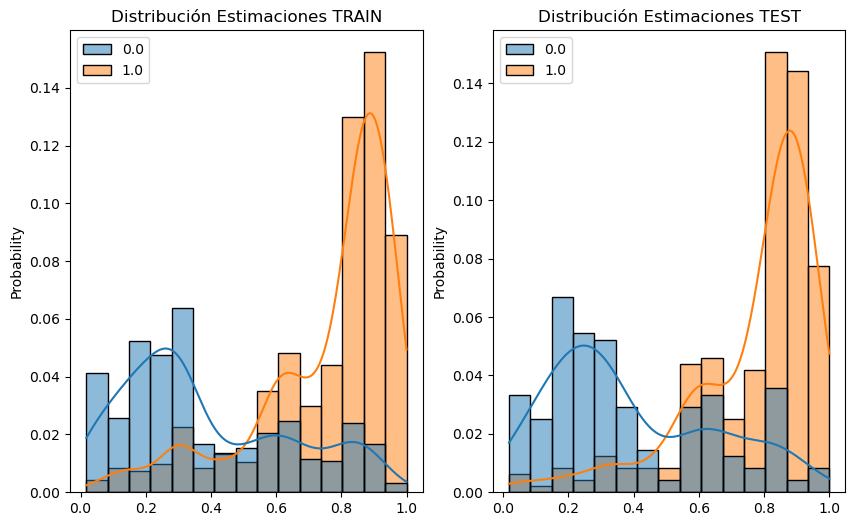

In [53]:
# Histogramas de predicción 
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.histplot(x = y_pred_prob_train,  
             alpha = 0.5,
             hue = y_train,
             stat = 'probability', 
             bins = 15,
            kde = True)
plt.title('Distribución Estimaciones TRAIN')
plt.subplot(122)
sns.histplot(x = y_pred_prob_test,  
             alpha = 0.5,
             hue = y_test,
             stat = 'probability', 
             bins = 15,
            kde = True)
plt.title('Distribución Estimaciones TEST')

##### ESTE COMPARATIVO, MUESTRA QUE TANTO EN LA MUESTRA DE ENTRENAMIENTO COMO EN LA MUESTRA DE TEST, LA PREDICCION DE LOS ESTUDIANTES NO RETENIDOS PARA EL SIGUIENTE AÑO,  APARECEN GRAFICADOS EN AZUL, CERCANOS A CERO Y LOS QUE SI SE RETIENEN ESTAN UBICADOS HACIA EL LADO DERECHO EN NARANJA, CERCANOS A UNO, LO QUE INDICA QUE EL MODELO ES EFICEINTE, POR LO MENOS DESDE EL PUNTO DE VISTA GRAFICO.

In [54]:
# Poder de ordenamiento
# Agrego predicción en mi dataframes
df_train['Predict_Prob_RegLog'] = y_pred_prob_train
df_test['Predict_Prob_RegLog'] = y_pred_prob_test

# Defino cortes
bin_edges = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
bin_labels = range(1, 6)

# Corto
df_train['Predict_RegLog_Bin'] = pd.cut(df_train['Predict_Prob_RegLog'], 
                                  bins=bin_edges, 
                                  labels=bin_labels, 
                                  include_lowest=True)
df_test['Predict_RegLog_Bin'] = pd.cut(df_test['Predict_Prob_RegLog'], 
                                  bins=bin_edges, 
                                  labels=bin_labels, 
                                  include_lowest=True)

# Genero agrupaciones
resultados_nodo_TRAIN = df_train.groupby('Predict_RegLog_Bin').agg(     
    Cant = ('Predict_RegLog_Bin', 'count'),              
    Cant_Sup = ('Retained.in.2012.', 'sum'),            
    Tasa_Sup = ('Retained.in.2012.', 'mean')    
).reset_index()

resultados_nodo_TEST = df_test.groupby('Predict_RegLog_Bin').agg(     
    Cant = ('Predict_RegLog_Bin', 'count'),              
    Cant_Sup = ('Retained.in.2012.', 'sum'),            
    Tasa_Sup = ('Retained.in.2012.', 'mean')    
).reset_index()

In [55]:
resultados_nodo_TRAIN

,Predict_RegLog_Bin,Cant,Cant_Sup,Tasa_Sup
0,1,251,37.0,0.147410
1,2,329,75.0,0.227964
2,3,203,106.0,0.522167
3,4,330,241.0,0.730303
4,5,798,711.0,0.890977


In [56]:
resultados_nodo_TEST

,Predict_RegLog_Bin,Cant,Cant_Sup,Tasa_Sup
0,1,57,7.0,0.122807
1,2,85,12.0,0.141176
2,3,51,28.0,0.549020
3,4,82,55.0,0.670732
4,5,203,179.0,0.881773


Text(0.5, 1.0, 'Poder de Ordenamiento - TEST')

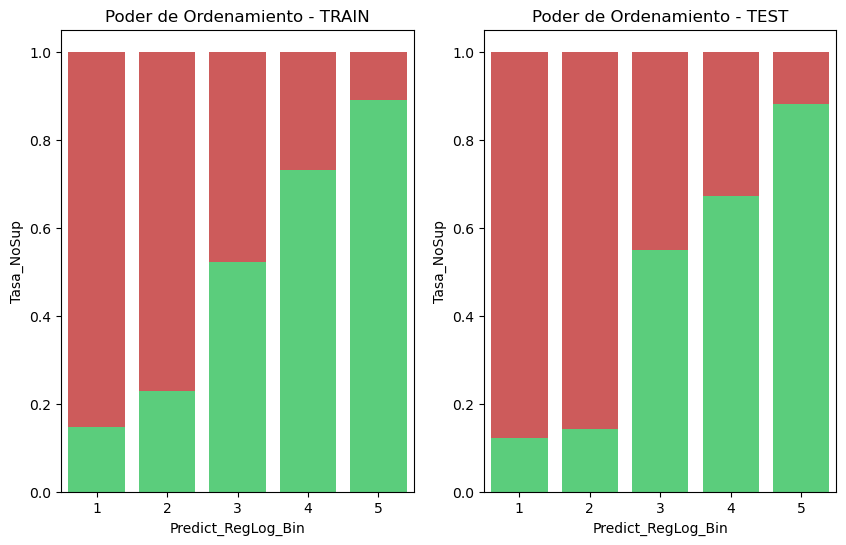

In [57]:
# Barplot por nodo 
resultados_nodo_TRAIN['Tasa_NoSup'] = (1 - resultados_nodo_TRAIN['Tasa_Sup'])
resultados_nodo_TEST['Tasa_NoSup'] = (1 - resultados_nodo_TEST['Tasa_Sup'])
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.barplot(data = resultados_nodo_TRAIN,
            x = 'Predict_RegLog_Bin',
            y = 'Tasa_Sup', 
            label = 'Porcentaje de Retención',
            color = '#48E074')
sns.barplot(data=resultados_nodo_TRAIN, 
            x = 'Predict_RegLog_Bin', 
            y = 'Tasa_NoSup', 
            bottom=resultados_nodo_TRAIN['Tasa_Sup'], 
            label = 'Porcentaje No Retención',
            color = '#E04848')
plt.title('Poder de Ordenamiento - TRAIN')
plt.subplot(122)
sns.barplot(data = resultados_nodo_TEST,
            x = 'Predict_RegLog_Bin',
            y = 'Tasa_Sup', 
            label = 'Porcentaje de Retención',
            color = '#48E074')
sns.barplot(data=resultados_nodo_TEST, 
            x = 'Predict_RegLog_Bin', 
            y = 'Tasa_NoSup', 
            bottom=resultados_nodo_TEST['Tasa_Sup'], 
            label = 'Porcentaje No Retención',
            color = '#E04848')
plt.title('Poder de Ordenamiento - TEST')

#### A nivel de poder de ordenamiento, se muestra un mejor desempeño en Train, ya que el crecimiento de las barras verdes, que son las que nos van indicando los estudiantes retenidos o que permanecen en la institución para el siguiente año, va aumentando de manera simetrica, lo que no esta ocurriendo en test. Debemos revisar ciertas features, que esten impactando, este resultado.

###  ROC CURVE

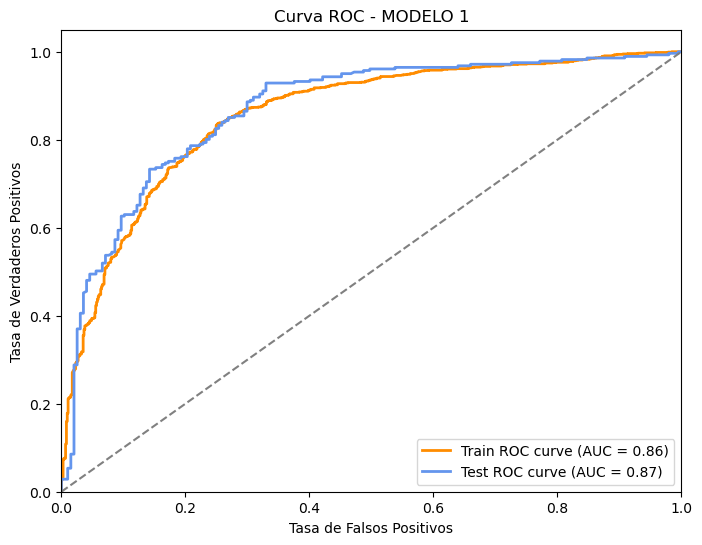

In [58]:
# ROC Y AUC
# Calcula las curvas ROC y el área bajo la curva (AUC) para entrenamiento y prueba
y_train = y_train
y_train_proba = y_pred_prob_train
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

y_test = y_test
y_test_proba = y_pred_prob_test
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Grafica las curvas ROC en el mismo gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - MODELO 1')
plt.legend(loc='lower right')
plt.show()

#### Este resultado muestra que no hay sino un punto de diferencia entre Test y Train, lo que muestra una muy buena relacion de las mismas, por otro lado, el valor de los AUC, estan por encima del 80% en ambos casos,  que significa una muy buena eficiencia del modelo.


## Metricas

In [59]:


print('TRAIN')
accuracy = round(accuracy_score(y_train, y_pred_train),3)
conf_matrix = confusion_matrix(y_train, y_pred_train)
recall = round(recall_score(y_train, y_pred_train),3)
f1 = round(f1_score(y_train, y_pred_train),3)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('-----------------------------------------------')
print('-----------------------------------------------')
print('TEST')
accuracy = round(accuracy_score(y_test, y_pred_test),3)
conf_matrix = confusion_matrix(y_test, y_pred_test)
recall = round(recall_score(y_test, y_pred_test),3)
f1 = round(f1_score(y_test, y_pred_test),3)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

TRAIN
Accuracy: 0.8
Recall: 0.874
F1 Score: 0.842
Confusion Matrix:
[[ 506  235]
 [ 148 1022]]
-----------------------------------------------
-----------------------------------------------
TEST
Accuracy: 0.812
Confusion Matrix:
[[134  63]
 [ 27 254]]
Recall: 0.904
F1 Score: 0.849


#### Las principales metricas muestran unos resultados buenos por encima del 80% en Train desertaron 506 estudiantes de los que habiamos predicho y se retuvieron 1022, dandonos unas cifras confiables en el modelo.

### Imputando Outliers

In [60]:
# Separamos en train y test
from sklearn.model_selection import train_test_split

# Variables a procesar
features = ['SingleGradeTripFlag_1', 'Is.Non.Annual._1', 'From.Grade_8.0',
       'SPR.New.Existing_NEW', 'FPP', 'Total.Pax', 'FRP.Active',
       'SchoolGradeTypeHigh_High', 'From.Grade_7.0', 'Num.of.Non_FPP.PAX','Retained.in.2012.']
df_limpia = df.dropna(subset= features)
df_train,df_test = train_test_split(df_limpia,
                                    test_size = 0.2, #Porcentaje de muestra test 
                                    random_state =77300) #Semilla
df_train = df_train.reset_index()
df_test = df_test.reset_index()

### Normalizamos los Datos

In [61]:
# Normalizamos los datos
from sklearn.preprocessing import StandardScaler

X_train = df_train[features].values
X_test = df_test[features].values

# Defino escalador
sc = StandardScaler()
# Genero parámetros con train
X_train = sc.fit_transform(X_train)
# Le aplico el escalador a test
X_test = sc.transform(X_test)

# Genero df
df_train_scaled = pd.DataFrame(data = X_train)
prefijo = "Scaled_"
df_train_scaled.columns = features
df_train_scaled.add_prefix(prefijo)
df_train_scaled = df_train_scaled.add_prefix(prefijo)
df_test_scaled = pd.DataFrame(data = X_test)
prefijo = "Scaled_"
df_test_scaled.columns = features
df_test_scaled = df_test_scaled.add_prefix(prefijo)

df_train_scaled.head()

,Scaled_SingleGradeTripFlag_1,Scaled_Is.Non.Annual._1,Scaled_From.Grade_8.0,Scaled_SPR.New.Existing_NEW,Scaled_FPP,Scaled_Total.Pax,Scaled_FRP.Active,Scaled_SchoolGradeTypeHigh_High,Scaled_From.Grade_7.0,Scaled_Num.of.Non_FPP.PAX,Scaled_Retained.in.2012.
0,0.894111,-0.425544,1.074455,1.436141,-0.479936,-0.441826,-0.967176,-0.347593,-0.525072,0.020545,-1.256562
1,0.894111,-0.425544,1.074455,-0.696311,3.398748,3.330287,2.406107,-0.347593,-0.525072,2.181761,0.795822
2,0.894111,-0.425544,-0.930705,-0.696311,5.591048,5.231931,4.407207,-0.347593,-0.525072,0.740951,0.795822
3,-1.118429,-0.425544,-0.930705,-0.696311,-0.648574,-0.660048,-0.452607,-0.347593,1.904500,-0.699860,-1.256562
4,0.894111,-0.425544,1.074455,-0.696311,-0.345025,-0.317128,-0.395433,-0.347593,-0.525072,0.020545,0.795822


### Identificamos Outliers

In [62]:
#Para identificarlos vamos a utilizar el algoritmo IsolationForest

from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

df_train_scaled_SinNa = df_train_scaled.dropna()
df_test_scaled_SinNa = df_test_scaled.dropna()


# Genero las matrices sin NAs para correr el algoritmo
X_train = df_train_scaled_SinNa.values
X_test = df_test_scaled_SinNa.values

# Identificar outliers en el dataset de train
iso = IsolationForest(contamination = 0.01) # contamination = proporcion de outliers esperada
yhat = iso.fit_predict(X_train)

# Marco Outlier en train
df_train_scaled_SinNa['EsOutlier'] = yhat == (-1)

# En test: 
yhat_test = iso.predict(X_test)
df_test_scaled_SinNa['EsOutlier'] = yhat_test == (-1)

df_train_scaled_SinNa.head()

,Scaled_SingleGradeTripFlag_1,Scaled_Is.Non.Annual._1,Scaled_From.Grade_8.0,Scaled_SPR.New.Existing_NEW,Scaled_FPP,Scaled_Total.Pax,Scaled_FRP.Active,Scaled_SchoolGradeTypeHigh_High,Scaled_From.Grade_7.0,Scaled_Num.of.Non_FPP.PAX,Scaled_Retained.in.2012.,EsOutlier
0,0.894111,-0.425544,1.074455,1.436141,-0.479936,-0.441826,-0.967176,-0.347593,-0.525072,0.020545,-1.256562,False
1,0.894111,-0.425544,1.074455,-0.696311,3.398748,3.330287,2.406107,-0.347593,-0.525072,2.181761,0.795822,False
2,0.894111,-0.425544,-0.930705,-0.696311,5.591048,5.231931,4.407207,-0.347593,-0.525072,0.740951,0.795822,False
3,-1.118429,-0.425544,-0.930705,-0.696311,-0.648574,-0.660048,-0.452607,-0.347593,1.904500,-0.699860,-1.256562,False
4,0.894111,-0.425544,1.074455,-0.696311,-0.345025,-0.317128,-0.395433,-0.347593,-0.525072,0.020545,0.795822,False


In [63]:
# Cuántos outliers marcó? 
df_train_scaled_SinNa['EsOutlier'].value_counts()

False    1891
True       20
Name: EsOutlier, dtype: int64

### PCA

In [64]:
# Aplicacion de PCA
from sklearn.decomposition import PCA
# Inicio el objeto PCA
pca = PCA()
# Genero componentes con TRAIN
PCA_train = pca.fit_transform(X_train)
# Aplico a test
PCA_test = pca.transform(X_test)

# Almaceno en dataframe y presento
# Train
PCA_train = pd.DataFrame(data = PCA_train)
prefijo = "PC_"
PCA_train = PCA_train.add_prefix(prefijo)
# Test
PCA_test = pd.DataFrame(data = PCA_test)
prefijo = "PC_"
PCA_test = PCA_test.add_prefix(prefijo)
# ¿Qué generé?
PCA_train.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,-0.643227,-1.178466,1.171423,0.073650,-1.834592,-0.522035,-0.528149,-0.644963,0.044598,-0.137881,-9.455841e-16
1,5.748621,1.632042,0.563302,-0.022115,-0.091286,0.022670,-0.140110,0.011199,0.159029,0.871501,-4.352145e-17
2,7.164881,3.700537,0.607335,-0.668306,0.170704,1.185506,-0.041922,2.144046,1.907449,2.539730,4.517880e-16
3,-1.961379,0.950015,-1.409473,-0.650091,0.156016,-0.179661,-1.516155,0.171294,-0.310667,0.144623,1.943831e-16
4,0.662773,-1.777958,-0.360998,0.254189,0.193915,-0.192358,0.010910,-0.316686,-0.184237,-0.147616,1.130737e-14


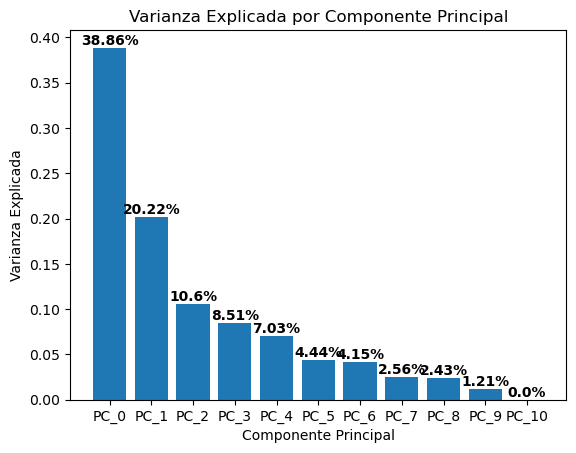

In [65]:
# Análisis de la varianza explicada para cada componente
varianza_explicada = pca.explained_variance_ratio_
componentes = PCA_train.columns

plt.bar(componentes, 
        varianza_explicada)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(y_text * 100,2))}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

#### El peso de los dos primeros componenetes representan el 59.08% de los datos, siendo los mas significativos. el primer componente captura la mayor variabilidad de los datos.

### KERNEL PCA

In [66]:
from sklearn.decomposition import KernelPCA
# Inicio el objeto KPCA
Kpca = KernelPCA(n_components = 4, 
                 kernel = 'sigmoid', 
                 gamma = 0.2)
# Genero componentes con TRAIN
KPCA_train = Kpca.fit_transform(X_train)
# Aplico a test
KPCA_test = Kpca.transform(X_test)

# Almaceno en dataframe y presento
# Train
KPCA_train = pd.DataFrame(data = KPCA_train)
prefijo = "KPC_"
KPCA_train = KPCA_train.add_prefix(prefijo)
# Test
KPCA_test = pd.DataFrame(data = KPCA_test)
prefijo = "PC_"
KPCA_test = KPCA_test.add_prefix(prefijo)
# ¿Qué generé?
KPCA_test.head()

,PC_0,PC_1,PC_2,PC_3
0,-0.860681,0.078166,-0.336950,0.127082
1,1.086283,0.670379,0.709187,-0.301749
2,-0.532023,0.516816,0.272088,-0.219399
3,1.227188,1.223064,0.389499,-0.038643
4,-0.152759,-0.414699,-0.233404,-0.081062


# DESAFIO 49 Crossvalidation Modelos de Machine Learning

Usamos esta tecnica para validar que nuestro modelo sirva para GENERALIZAR, lo que sugiere que cada vez que se incluyan nuevas muestras, el modelo va a ser muy parecido en sus predicciones.
Por lo tanto debemos probar errores de generalización a continuación:

In [71]:

# Selecciono las variables no binarias
features_no_bin = [  'Tuition','FRP.Active', 'FRP.Cancelled', 'FRP.Take.up.percent.','Early.RPL','From.Grade_8.0','FPP','SPR.Group.Revenue'
        ,'Retained.in.2012.']


X_train = df[features_no_bin].values

# Defino escalador
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

# Genero df
df_scaled = pd.DataFrame(data = X_train)
prefijo = "Scaled_"
df_scaled.columns = features_no_bin
df_scaled.add_prefix(prefijo)
df_scaled = df_scaled.add_prefix(prefijo)

# Genero dataset para modelar
features_bin = ['SingleGradeTripFlag_1', 'Is.Non.Annual._1', 
       'SPR.New.Existing_NEW']

df_train_final = pd.concat([df_scaled,df[features_bin]],axis = 1)

df_train_final.head()

,Scaled_Tuition,Scaled_FRP.Active,Scaled_FRP.Cancelled,Scaled_FRP.Take.up.percent.,Scaled_Early.RPL,Scaled_From.Grade_8.0,Scaled_FPP,Scaled_SPR.Group.Revenue,Scaled_Retained.in.2012.,SingleGradeTripFlag_1,Is.Non.Annual._1,SPR.New.Existing_NEW
0,-1.846961,0.480085,-0.083119,-0.636306,0.094662,-0.940250,0.951156,-1.846961,0.804022,1,0,0
1,1.139266,-0.464468,1.548978,-0.701349,-4.084049,1.063547,-0.319213,1.139266,0.804022,1,0,0
2,-0.673246,0.007809,0.732929,0.595170,0.904287,1.063547,-0.250544,-0.673246,0.804022,1,0,0
3,-1.921384,-0.995779,-0.899168,-2.474848,-0.009806,-0.940250,-0.456550,-1.921384,-1.243748,0,1,0
4,-1.163198,1.365603,1.276961,-0.332773,0.094662,-0.940250,1.706510,-1.163198,-1.243748,0,0,0


In [72]:
# Reordeno aleatoriamente
df_train_final = df_train_final.sample(frac=1, random_state=42)
df_train_final.head()

,Scaled_Tuition,Scaled_FRP.Active,Scaled_FRP.Cancelled,Scaled_FRP.Take.up.percent.,Scaled_Early.RPL,Scaled_From.Grade_8.0,Scaled_FPP,Scaled_SPR.Group.Revenue,Scaled_Retained.in.2012.,SingleGradeTripFlag_1,Is.Non.Annual._1,SPR.New.Existing_NEW
1320,-1.908980,0.125878,-0.627151,-0.415161,1.478860,-0.940250,0.298805,-1.908980,0.804022,1,0,0
1412,0.778004,-0.169295,-0.355135,0.417386,-0.009806,-0.940250,-0.353547,0.778004,-1.243748,1,0,1
530,-1.363211,0.716223,0.732929,-0.480204,0.094662,1.063547,1.088493,-1.363211,0.804022,1,0,0
554,0.284951,-0.228329,-0.355135,1.553466,-0.009806,1.063547,-0.593887,0.284951,0.804022,1,0,1
229,-0.863956,0.125878,-0.627151,0.577825,-0.035923,-0.940250,-0.147541,-0.863956,0.804022,0,0,0


## Intento 1: Problema de Varianza
Un posible problema en la varianza del modelo significa que las métricas de validación en distintas submuestras es muy diferente, por lo que podríamos tener problemas de Generalización.

In [91]:
# Como mi data es demasiado pequeño, tomo el total de registros y no separo en train y test porque solo tengo 2380 registros.
# Obtengo data en values
X = df_train_final.drop(columns='Scaled_Retained.in.2012.').values
y = df_train_final['Scaled_Retained.in.2012.'].values

# Librerias
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Creo el modelo
model = RandomForestRegressor(random_state = 42, 
                              n_estimators = 10,
                              max_depth = 100,
                              max_features = 12,
                              min_samples_leaf = 1)

k_elegido = 7

scores = cross_val_score(model, X, y, cv=k_elegido, scoring='r2')

scores_df = pd.DataFrame({'K_orden': range(1,k_elegido+1),
                          'Scores' : scores})

scores_df

,K_orden,Scores
0,1,0.234047
1,2,0.280474
2,3,0.355849
3,4,0.218578
4,5,0.214412
5,6,0.236913
6,7,0.319895


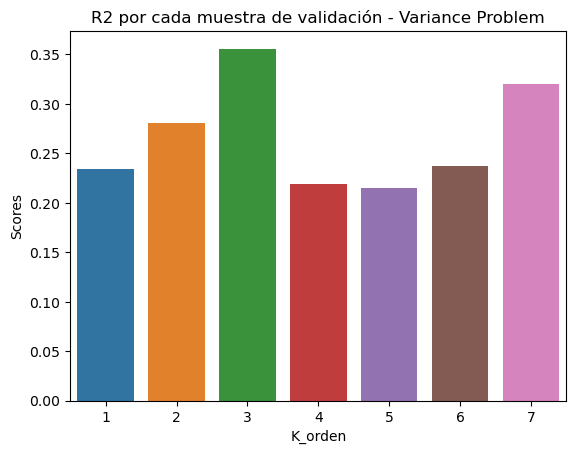

In [92]:
# Visualmente
plt.figure()
sns.barplot(data = scores_df,
              x = 'K_orden',
              y = 'Scores')
plt.title('R2 por cada muestra de validación - Variance Problem')
plt.show()

Tengo dispersiones grandes en los grupos:dos, tres y siete, lo que indica es que este modelo no es tan bueno para generalizar. El modelo tiene problemas de varianza.

In [94]:
# genero las Metricas
media_1 = scores_df['Scores'].mean()
desvio_1 = scores_df['Scores'].std()

print('R2 Promedio: ', round(media_1,4))
print('R2 Desvio: ', round(desvio_1,4))
print('R2 CV: ', round(desvio_1 / media_1,4))

R2 Promedio:  0.2657
R2 Desvio:  0.0547
R2 CV:  0.2059


## Intento 2: Problema de Sesgo


In [142]:
# Obtengo data en values
X = df_train_final.drop(columns='Scaled_Retained.in.2012.').values
y = df_train_final['Scaled_Retained.in.2012.'].values

# Librerias
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo
model = RandomForestRegressor(random_state = 42, 
                              n_estimators = 10,
                              max_depth = 2,
                              max_features = 12,
                              min_samples_leaf = 45
                             )

k_elegido = 2

scores = cross_val_score(model, X, y, cv=k_elegido, scoring='r2')

scores_df = pd.DataFrame({'K_orden': range(1,k_elegido+1),
                          'Scores' : scores})

scores_df

,K_orden,Scores
0,1,0.304957
1,2,0.264020


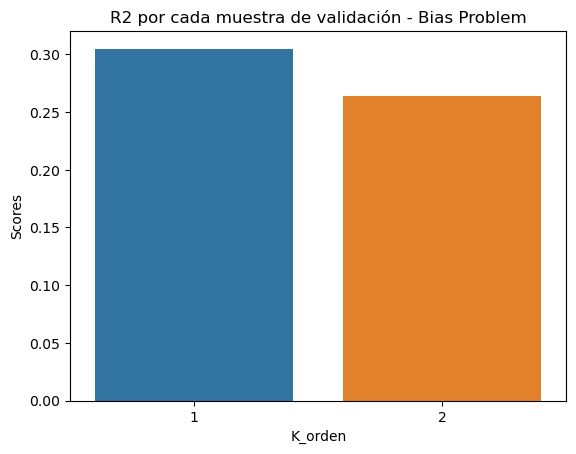

In [143]:
# Visualmente
plt.figure()
sns.barplot(data = scores_df,
              x = 'K_orden',
              y = 'Scores')
plt.title('R2 por cada muestra de validación - Bias Problem')
plt.show()

In [144]:
# Metricas
media_2 = scores_df['Scores'].mean()
desvio_2 = scores_df['Scores'].std()

print('R2 Promedio: ', round(media_2,4))
print('R2 Desvio: ', round(desvio_2,4))
print('R2 CV: ', round(desvio_2 / media_2,4))

R2 Promedio:  0.2845
R2 Desvio:  0.0289
R2 CV:  0.1018


## Intento 3: Intentando resolver ambos problemas
Veamos de elegir hiperparámetros que maximicen las métricas, y minimicen la varianza. 

In [145]:
# Obtengo data en values
X = df_train_final.drop(columns='Scaled_Retained.in.2012.').values
y = df_train_final['Scaled_Retained.in.2012.'].values

# Librerias
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo
model = RandomForestRegressor(random_state = 42, 
                              n_estimators = 100,
                              max_depth = 6,
                              max_features = 6,
                              min_samples_leaf = 25)

k_elegido = 5

scores = cross_val_score(model, X, y, cv=k_elegido, scoring='r2')

scores_df = pd.DataFrame({'K_orden': range(1,k_elegido+1),
                          'Scores' : scores})

scores_df

,K_orden,Scores
0,1,0.364318
1,2,0.416063
2,3,0.366956
3,4,0.381691
4,5,0.401022


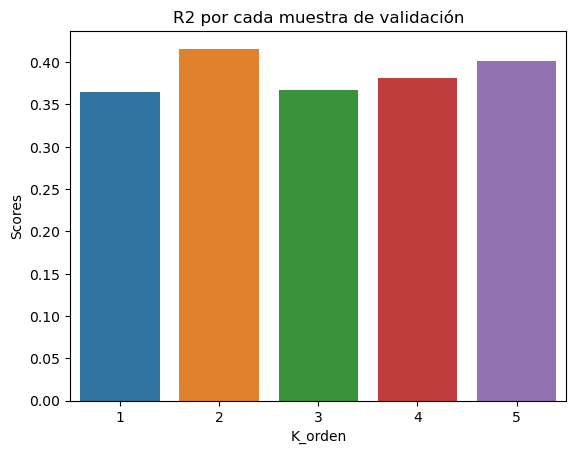

In [140]:
# Visualmente
plt.figure()
sns.barplot(data = scores_df,
              x = 'K_orden',
              y = 'Scores')
plt.title('R2 por cada muestra de validación')
plt.show()

Resolvemos el problema de varianza de manera significativa, ya son mas parecidos los r2 en cada uno de los grupos.

In [146]:
# Metricas
media_3 = scores_df['Scores'].mean()
desvio_3 = scores_df['Scores'].std()

print('R2 Promedio: ', round(media_3,4))
print('R2 Desvio: ', round(desvio_3,4))
print('R2 CV: ', round(desvio_3 / media_3,4))

R2 Promedio:  0.386
R2 Desvio:  0.0223
R2 CV:  0.0576


In [147]:
# En cuánto resolvimos el problema? 
print('Varianza')
print('Coeficiente de Variación R2 - Intento 1: ', round(desvio_1 / media_1,4))
print('Coeficiente de Variación R2 - Intento 3: ', round(desvio_3 / media_3,4))
print('Mejora: ', round(((desvio_3 / media_3) / (desvio_1 / media_1) - 1 ) * 100), '%')

print('')

print('Bias')
print('Promedio R2 - Intento 2: ', round(media_2,4))
print('Promedio R2 - Intento 3: ', round(media_3,4))
print('Mejora: ', round(((media_3) / (media_2) - 1 ) * 100), '%')

Varianza
Coeficiente de Variación R2 - Intento 1:  0.2059
Coeficiente de Variación R2 - Intento 3:  0.0576
Mejora:  -72 %

Bias
Promedio R2 - Intento 2:  0.2845
Promedio R2 - Intento 3:  0.386
Mejora:  36 %


se mejora la varianza en setenta y dos porciento. por ciento y el ruido en treinta y seis por ciento. Ahora podriamos decir que el model puede servir para generlaizar.